<hr>
<p style="text-align:left;">
    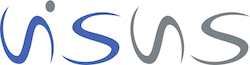
    <span style="float:right;">
        University of Stuttgart<br />Visualization Research Center
    </span>
</p>
<hr>
<p style="text-align:left;">
    <span style="float:left;">
        Prof. Daniel Weiskopf
    </span>
    <span style="float:right;">
        Sunday, 2024-11-17
    </span>
</p>
<br/>

# Theoretical and Methodological Foundations of Visual Computing
## Assignment 05
Responsible tutor: Isha Sharma
<br/>

> *Please submit your solution to ILIAS by <b>Sunday, 2024-11-24, 23:55</b>. <br /> Solutions will be discussed in the tutorial on <b>Thursday, 2024-11-28</b>.* <br /> *Please note that source code will only be accepted if it compiles.*
<hr>

**Student name(s):** <font color='green'>Guangxin Zhao</font> <br />
**Immatriculation number(s):** <font color='green'>st194136</font> <br />

<hr>

### Exercise 5.1 (4 points)
Given the cone in $\mathbb{R}^3$ with base radius $R$, height $H$ (see figure), compute its surface area using surface integral. Note that the area of the base is not included.

	*Hint: Parametrize the cone using cylindrical coordinates.*


<div align="center">
  <img src="cone3.png" alt="Figure: A cone illustration." width="30%">
  <p><strong>Figure 1</strong></p>
</div>



Parametrize the cone using cylindrical coordinates $(r, \theta, x)$, in which

\begin{align*}
    r 		&\text{: radius from the } x \text{-axis} 	& \in [0, R], \\
    \theta 	&\text{: angle from the } x \text{-axis} 	& \in [0, 2\pi], \\
    x 		&\text{: height from the base} 				& \in [0, H].
\end{align*}

According to the similarity of triangles, we have

\begin{align*}
    \frac{r}{R} &= \frac{x}{H} \quad \Rightarrow \quad x = \frac{H}{R} r.
\end{align*}

We can then parametrize the cone as

\begin{align*}
    \vec{r}(r, \theta) &= (r \cos \theta, r \sin \theta, \frac{H}{R} r).
\end{align*}

Calculate the partical deritive of $\vec{r}$ with respect to $r$ and $\theta$:

\begin{align*}
    \frac{\partial \vec{r}}{\partial r} 
		&= (\cos \theta, \sin \theta, \frac{H}{R}), \\
    \frac{\partial \vec{r}}{\partial \theta} 
		&= (-r \sin \theta, r \cos \theta, 0).
\end{align*}

Thus, 

\begin{align*}
    g_{rr} 
		&= \langle \frac{\partial \vec{r}}{\partial r}, \frac{\partial \vec{r}}{\partial r} \rangle = 1 + \frac{H^2}{R^2}, \\
    g_{r\theta} 
		&= \langle \frac{\partial \vec{r}}{\partial r}, \frac{\partial \vec{r}}{\partial \theta} \rangle = 0, \\
    g_{\theta \theta} 
		&= \langle \frac{\partial \vec{r}}{\partial \theta}, \frac{\partial \vec{r}}{\partial \theta} \rangle = r^2, \\
    g 	&= \det \begin{pmatrix} g_{rr} & g_{r\theta} \\ g_{r\theta} & g_{\theta \theta} \end{pmatrix} = r^2 (1 + \frac{H^2}{R^2}).
\end{align*}

Then, the surface area of the cone is

\begin{align*}
    A   &= \int_{\mathbb{U}} \sqrt{g} \, \mathrm{d}r \, \mathrm{d}\theta \\
        &= \int_0^{2\pi} \int_0^R r \sqrt{1 + \frac{H^2}{R^2}} \, \mathrm{d}r \, \mathrm{d}\theta \\
        &= \int_0^{2\pi} \frac{R^2}{2} \sqrt{1 + \frac{H^2}{R^2}} \, \mathrm{d}\theta \\
        &= \pi R^2 \sqrt{1 + \frac{H^2}{R^2}}.
\end{align*}

<hr>

### Exercise 5.2 (4 points)

Given the function $f(x)=\frac{1}{1+\sinh{(2x)}\log^2x}$ in the domain $\mathbb{D}=(0,1]$.

- **a)** Calculate the integral $\int_{\mathbb{D}}f(x)\mathrm{d}x$ using Monte Carlo integration based on the MC estimator $F_N=\frac{b-a}{N}\sum^{N}_{i=1}f(X_i)$ and give the error depending on the number of sample values $N$. Implement a solution in python.

- **b)** Implement integration using the Simpson rule in python and compare your result to the result of a) by visualizing the convergence of both approaches.

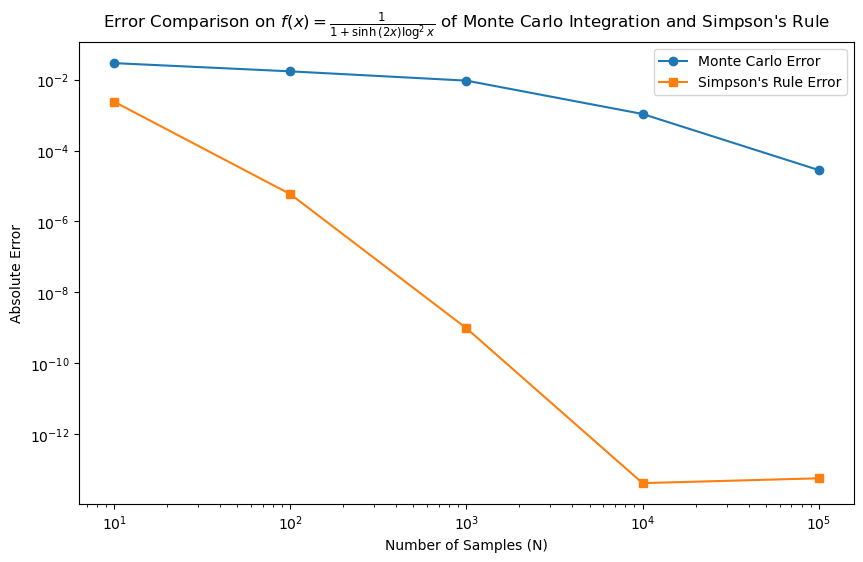

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

A = 0.01  # Lower bound of integration (avoid x = 0)
B = 1     # Upper bound of integration
N_values = np.logspace(1, 5, 5, dtype=int)  # Number of samples

# Define the function
def f(x):
    return 1 / (1 + np.sinh(2 * x) * np.log(x)**2)

# Monte Carlo Integration
def monte_carlo(f, a, b, n):
    x = np.random.uniform(a, b, n)  # Generate random samples
    y = f(x)                        # Evaluate the function
    integral = (b - a) * np.mean(y) # Monte Carlo estimator
    return integral

# Simpon's rule
def simpson(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    integral = h / 3 * (y[0] + y[-1] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-1:2]))
    return integral

# Calculate the integrals and errors
exact_integral, _ = quad(f, A, B)
monte_carlo_errors = []
simpsons_errors = []
for N in N_values:
    monte_carlo_integral = monte_carlo(f, A, B, N)
    monte_carlo_errors.append(np.abs(monte_carlo_integral - exact_integral))

    simpsons_integral = simpson(f, A, B, N)
    simpsons_errors.append(np.abs(simpsons_integral - exact_integral))

# Plot the errors
plt.figure(figsize=(10, 6))
plt.loglog(N_values, monte_carlo_errors, 'o-', label='Monte Carlo Error')
plt.loglog(N_values, simpsons_errors, 's-', label="Simpson's Rule Error")
plt.xlabel('Number of Samples (N)')
plt.ylabel('Absolute Error')
plt.title('Error Comparison on $f(x)=\\frac{1}{1+\\sinh{(2x)}\\log^2x}$ of Monte Carlo Integration and Simpson\'s Rule')
plt.legend()
plt.show()

<hr>

### Exercise 5.3 (6 points)

Given the unit hemisphere $\mathcal{H}^2$ and the probability density function (PDF) with $\rho: \reals^2 \rightarrow \reals,\ \theta \in [0,\pi/2], \phi \in [0, 2\pi]$

$\rho(\theta, \phi) = c \cos\theta \sin\theta.$

- **a)** Determine the normalization constant $c$ on the hemisphere $\mathcal{H}^2$.

- **b)** Calculate the marginal density functions and conditional density functions.

- **c)** Give the sampling functions for a point $(\theta,\phi)$ depending on the uniform samples $\xi_1,\xi_2\in [0,1]$. To do this, first calculate the cumulative distribution function for $\theta$.
		



**a)** The normalization constant $c$ is determined by the condition that the integral of the PDF over the hemisphere is equal to 1:

\begin{align*}
    1 	&= \int_{\mathcal{H}^2} \rho(\theta, \phi) \, \mathrm{d}\theta \, \mathrm{d}\phi \\
      	&= \int_0^{2\pi} \int_0^{\pi/2} c \cos\theta \sin\theta \, \mathrm{d}\theta \, \mathrm{d}\phi \\
	  	&= \int_0^{2\pi} c \left[ -\frac{1}{2} \cos^2\theta \right]_0^{\pi/2} \, \mathrm{d}\phi \\
	  	&= \int_0^{2\pi} \frac{c}{2} \, \mathrm{d}\phi \\
	  	&= \pi c.
\end{align*}

Thus, $c = \frac{1}{\pi}$.

**b)** Given that $c = \frac{1}{\pi}$ and $\rho(\theta, \phi) = c \cos\theta \sin\theta$, we have 

$$
\rho(\theta, \phi) = \frac{1}{\pi} \cos\theta \sin\theta.
$$

The marginal density function can be calculated as

\begin{align*}
    \rho(\theta) 	
		&= \int_0^{2\pi} \rho(\theta, \phi) \, \mathrm{d}\phi \\
		&= \int_0^{2\pi} \frac{1}{\pi} \cos\theta \sin\theta \, \mathrm{d}\phi \\
		&= \frac{1}{\pi} \cos\theta \sin\theta \int_0^{2\pi} \, \mathrm{d}\phi \\
		&= 2 \cos\theta \sin\theta.
\end{align*}

And the conditional density function can be calculated as

\begin{align*}
	\rho(\phi \mid \theta) 
		&= \frac{\rho(\theta, \phi)}{\rho(\theta)} \\
		&= \frac{\frac{1}{\pi} \cos\theta \sin\theta}{2 \cos\theta \sin\theta} \\
		&= \frac{1}{2\pi}.
\end{align*}

**c)** The cumulative distribution function for $\rho(\theta)$ is calculated as follows:

\begin{align*}
	\Phi(\theta) 
		&= \int_0^{\theta} 2 \cos\theta' \sin\theta' \, \mathrm{d}\theta' \\
		&= \left[- \cos^2\theta' \right]_0^{\theta} \\
		&= 1 - \cos^2\theta \\
		&= \sin^2\theta.
\end{align*}

Similarly, the cumulative distribution function for $\rho(\phi \mid \theta)$ is given by:

\begin{align*}
	\Phi(\phi \mid \theta) 
		&= \int_0^{\phi} \frac{1}{2\pi} \, \mathrm{d}\phi \\
		&= \frac{\phi}{2\pi}.
\end{align*}

We can then generate the point $(\theta, \phi)$ from the uniform random samples $\xi_1, \xi_2 \in [0, 1]$ using inverse transformation:

\begin{align*}
	& \Phi(\theta) = \xi_1 \quad & \Rightarrow & \quad \sin^2\theta = \xi_1 \quad & \Rightarrow & \quad \theta = \arcsin(\sqrt{\xi_1}), \\
	& \Phi(\phi \mid \theta) = \xi_2 & \Rightarrow & \quad \frac{\phi}{2\pi} = \xi_2 \quad & \Rightarrow & \quad \phi = 2\pi \xi_2.
\end{align*}

<hr>

### Exercise 5.4 (6 points)

Given the initial value problem
  
  $y'(x)=2x(y(x))^2,\ \ y(0)=y_0>0$
  
  with $x\in I\subset\mathbb{R},\ y\in J\subset\mathbb{R}$. Determine the solution $y(x)$ and the maximum definition interval $I_0$ for $x$.
  

		



We can reformulate the initial value problem as

\begin{align*}
	\frac{y'(x)}{y(x)^2} = 2x.
\end{align*}

Replace $y'(x)$ with $\frac{\mathrm{d}y}{\mathrm{d}x}$, we have

\begin{align*}
	\frac{\mathrm{d}y}{y(x)^2} = 2x  \, \mathrm{d}x.
\end{align*}

Integrate both sides, we have

\begin{align*}
	\int \frac{\mathrm{d}y}{y(x)^2} = \int 2x \, \mathrm{d}x.
\end{align*}

For the left-hand side:

\begin{align*}
	\int \frac{\mathrm{d}y}{y(x)^2} 
		&= -\frac{1}{y(x)},
\end{align*}

and for the right-hand side:

\begin{align*}
	\int 2x \, \mathrm{d}x 
		&= x^2 + C.
\end{align*}

Thus, 

\begin{align*}
	-\frac{1}{y(x)} = x^2 + C,
\end{align*}

and 

\begin{align*}
	y(x) = -\frac{1}{x^2 + C}.
\end{align*}

Taking the initial condition $y(0) = y_0$, we have

\begin{align*}
	y_0 = -\frac{1}{C} \quad \Rightarrow \quad C = -\frac{1}{y_0}.
\end{align*}

Thus, the solution to the initial value problem is

\begin{align*}
	y(x) = -\frac{1}{x^2 - \frac{1}{y_0}}.
\end{align*}

Considering the solution of the initial value problem, we can see that $y(x)$ is only defined when $x \neq \pm \frac{1}{\sqrt{y_0}}$. Thus, the definition interval $I_0$ for $x$ is $I_0 = (-\infty, \infty) \setminus \{-\frac{1}{\sqrt{y_0}}, \frac{1}{\sqrt{y_0}}\}$.

However, the restriction that $y'(x)=2x(y(x))^2$ implies that $y(x)$ is always positive. 

Since $y(x)^2 \geq 0$, the sign of $y'(x)$ is determined by $x$:

- For $x < 0$, $y'(x) < 0$, which indicates $y(x)$ is decreasing.
- For $x > 0$, $y'(x) > 0$, which indicates $y(x)$ is increasing. 

Thus, $y(0)=y_0$ is the minimum value of $y(x)$, which yields that $y(x)$ is always positive.

Recall that $y(x) = -\frac{1}{x^2 - \frac{1}{y_0}}$, we have

\begin{align*}
	y(x) > 0 \quad \Rightarrow \quad x^2 - \frac{1}{y_0} < 0 \quad \Rightarrow \quad -\frac{1}{\sqrt{y_0}} < x < \frac{1}{\sqrt{y_0}}.
\end{align*}

Thus, the maximum definition interval $I_0$ for $x$ is $I_0 = (-\frac{1}{\sqrt{y_0}}, \frac{1}{\sqrt{y_0}})$.

<hr>

### Bonus-Exercise (3 points)
1. The numerical integration of a linear function $g: \mathbb{R} \rightarrow \mathbb{R}$ is . . .

- [ ] exact for the Simpson’s Rule but not for the trapezoidal rule and midpoint rule.
- [ ] exact for the Simpson’s Rule and trapezoidal rule but not for the midpoint rule.
- [x] exact for the Simpson’s Rule, trapezoidal rule, and midpoint rule.
- [ ] not exact for the Simpson’s Rule, trapezoidal rule, and midpoint rule.

All three methods can exactly sample linear functions. Thus the numerical integration of a linear function $g: \mathbb{R} \rightarrow \mathbb{R}$ is exact for the Simpson’s Rule, trapezoidal rule, and midpoint rule.

2. The Monte Carlo integration of the function $f(x) = x^4$ on the interval $[-1,1]$ can be improved by the following probability density function (importance sampling):

<div style="display: flex; justify-content: space-around;">

<div style="text-align: center; width: 25%;">
<img src="pdf1.png" alt="$\square$" style="width: 100%;">
<p>[ ]</p>
</div>

<div style="text-align: center; width: 25%;">
<img src="pdf2.png" alt="$\square$" style="width: 100%;">
<p>[ ]</p>
</div>

<div style="text-align: center; width: 25%;">
<img src="pdf3.png" alt="$\square$" style="width: 100%;">
<p>[x]</p>
</div>

<div style="text-align: center; width: 25%;">
<img src="pdf4.png" alt="$\square$" style="width: 100%;">
<p>[ ]</p>
</div>

</div>

Only the third PDF is a good choice for importance sampling since shape of the PDF is similar to the function $f(x) = x^4$.

3. What is the approximate result of the following MATLAB code? Hint: executing
the code takes nearly 7 days


```python

def f(x):
    return np.exp(-x**2)

result = 0
num_iterations = 10**10

for k in range(num_iterations):
    #xi is a uniformly distributed value between -1000 and 1000
    xi = np.random.uniform(-1000, 1000)
    result += f(xi)

result = result / num_iterations
result = result * 2000

print(f"The result: {result:.6f}")

```

- [ ] the result is 0.
- [x] the result is √π.
- [ ] the result is √2π.
- [ ] the result is inf.

The code is an implementation of the Monte Carlo integration. The function is $f(x) = \exp(-x^2)$, and the code calculates the average value of the function over the interval $[-1000, 1000]$. The result of the code is approximately the integral of the function, which is $\sqrt{\pi}$.

<div class="alert alert-success">

### Guidelines for Submission

Do not forget to update the student name(s) and matriculation number(s). 

**Text-based Responses**

For text-based questions, a markdown cell with the placeholder `Cell left blank for student response` will usually follow the question. Ensure that text responses are either entered in markdown cells using plain text and LaTeX or via the import of PDFs or PNG files (e.g. via `![ExampleFileName](example_file.png)` for handwritten solutions). If external files are used in your Jupyter Notebook, make sure to include all data in a zipped folder uploaded to Ilias.

**Code-based Responses**

For questions that involve Python coding, you'll typically find a code cell with the placeholder `# YOUR CODE HERE`.

#### Submission Process

To ensure your notebook runs smoothly from start to finish, select "Restart & Run All" from the "Kernel" menu before submitting.

When ready to submit, upload your `.ipynb` file (or a zipped folder containing the `.ipynb` file as well as all auxiliary files, e.g. imported .pdf or .jpg files) to Ilias.

</div>